In [1]:
users = [
    {"id": 0, "name": "Hero"},
    {"id": 1, "name": "Dunn"},
    {"id": 2, "name": "Sue"},
    {"id": 3, "name": "Chi"},
    {"id": 4, "name": "Thor"},
    {"id": 5, "name": "Clive"},
    {"id": 6, "name": "Hicks"},
    {"id": 7, "name": "Devin"},
    {"id": 8, "name": "Kate"},
    {"id": 9, "name": "Klein"},
]

friendship_pairs = [
    (0, 1),
    (0, 2),
    (1, 2),
    (1, 3),
    (2, 3),
    (3, 4),
    (4, 5),
    (5, 6),
    (5, 7),
    (6, 8),
    (7, 8),
    (8, 9),
]

In [2]:
# Initialize the dict with an empty list for each user id:
friendships = {user["id"]: [] for user in users}

# And loop over the friendship pairs to populate it:
for i, j in friendship_pairs:
    friendships[i].append(j)  # Add j as a friend of user i
    friendships[j].append(i)  # Add i as a friend of user j
    
print(friendships)

{0: [1, 2], 1: [0, 2, 3], 2: [0, 1, 3], 3: [1, 2, 4], 4: [3, 5], 5: [4, 6, 7], 6: [5, 8], 7: [5, 8], 8: [6, 7, 9], 9: [8]}


In [3]:
def number_of_friends(user):
    """How many friends does user have?"""
    user_id = user["id"]
    friend_ids = friendships[user_id]
    return len(friend_ids)

total_connections = sum(number_of_friends(user) for user in users) # 24

total_connections

24

In [4]:
num_users = len(users)
avg_connections = total_connections / num_users

avg_connections

2.4

In [5]:
"""sort them from “most friends” to “least friends”"""

# Create a list (user_id, number_of_friends).
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]

num_friends_by_id.sort(key=lambda id_and_friends: id_and_friends[1], reverse=True)

num_friends_by_id

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

In [6]:
# code to iterate over their friends and collect the friends’ friends


def foaf_ids_bad(user):
    """foaf is short for "friend of a friend" """
    return [foaf_id for friend_id in friendships[user["id"]] for foaf_id in friendships[friend_id]]

foaf_ids_bad(users[0])  # foaf of user 0 (Hero)

[0, 2, 3, 0, 1, 3]

In [7]:
#produce a count of mutual friends

from collections import Counter # not loaded by default


def friends_of_friends(user):
    user_id = user["id"]
    return Counter(
    foaf_id
    for friend_id in friendships[user_id] # For each of my friends,
    for foaf_id in friendships[friend_id] # find their friends
    if foaf_id != user_id # who aren't me
    and foaf_id not in friendships[user_id] # and aren't my friends.
)
    
print(friends_of_friends(users[3])) # Counter({0: 2, 5: 1})

# This correctly tells Chi (id 3) that she has two mutual friends with Hero (id 0) but only one mutual friend with Clive (id 5).

Counter({0: 2, 5: 1})


In [8]:
interests = [
(0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
(0, "Spark"), (0, "Storm"), (0, "Cassandra"),
(1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
(1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
(2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
(3, "statistics"), (3, "regression"), (3, "probability"),
(4, "machine learning"), (4, "regression"), (4, "decision trees"),
(4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
(5, "Haskell"), (5, "programming languages"), (6, "statistics"),
(6, "probability"), (6, "mathematics"), (6, "theory"),
(7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
(7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
(8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
(9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [9]:
# a function that finds users with a certain interest


def data_scientists_who_like(target_interest):
    """Find the ids of all users who like the target interest."""
    return [user_id for user_id, user_interest in interests if user_interest == target_interest]

In [10]:
# building an index from interests to users
from collections import defaultdict

# Keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)
    
# another from users to interests

# Keys are user_ids, values are lists of interests for that user_id.
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)


In [11]:
# to find who has the most interests in common with a given user:
#- Iterate over the user’s interests.
#- For each interest, iterate over the other users with that interest.
#- Keep count of how many times we see each other user.

def most_common_interests_with(user):
    # return Counter(
    #     interested_user_id
    #     for interest in interests_by_user_id[user["id"]]
    #     for interested_user_id in user_ids_by_interest[interest]
    #     if interested_user_id != user["id"]
    # )
    interested_user_ids = []
    for interest in interests_by_user_id[user["id"]]:
        for interested_user_id in user_ids_by_interest[interest]:
            if interested_user_id != user["id"]:
                interested_user_ids.append(interested_user_id)
    return Counter(interested_user_ids)
    
most_common_interests_with(users[0])    

Counter({9: 3, 1: 2, 8: 1, 5: 1})

## Salaries and Experience

In [12]:
salaries_and_tenures = [
    (83000, 8.7),
    (88000, 8.1),
    (48000, 0.7),
    (76000, 6),
    (69000, 6.5),
    (76000, 7.5),
    (60000, 2.5),
    (83000, 10),
    (48000, 1.9),
    (63000, 4.2),
]

Text(0.5, 1.0, 'Salary vs. Tenure')

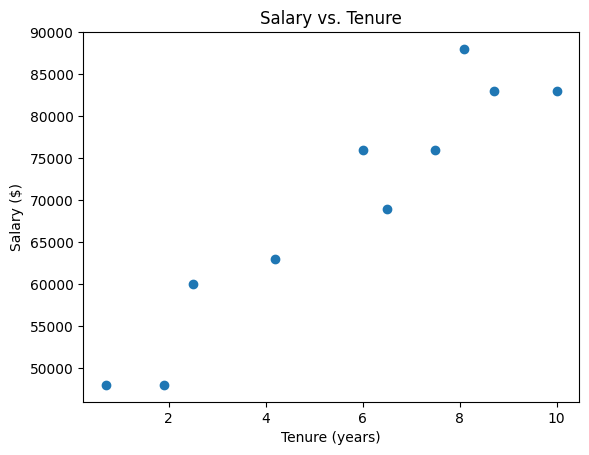

In [13]:
import matplotlib.pyplot as plt

x = [tenure for _, tenure in salaries_and_tenures]
y = [salary for salary, _ in salaries_and_tenures]
plt.scatter(x, y)
plt.xlabel("Tenure (years)")
plt.ylabel("Salary ($)")
plt.title("Salary vs. Tenure")

In [14]:
from pprint import pprint

# Keys are years, values are lists of the salaries for each tenure.
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)
    
# Keys are years, each value is average salary for that tenure.
average_salary_by_tenure = {
    tenure: sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()    
}

pprint(salary_by_tenure)

pprint(average_salary_by_tenure)


# NOT USEFUL BECAUSE NOONE HAS THE SAME TENURE

defaultdict(<class 'list'>,
            {0.7: [48000],
             1.9: [48000],
             2.5: [60000],
             4.2: [63000],
             6: [76000],
             6.5: [69000],
             7.5: [76000],
             8.1: [88000],
             8.7: [83000],
             10: [83000]})
{0.7: 48000.0,
 1.9: 48000.0,
 2.5: 60000.0,
 4.2: 63000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 8.1: 88000.0,
 8.7: 83000.0,
 10: 83000.0}


In [15]:
# Applying buckets to these tenure ranges

def tenure_bucket(tenure):
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
        return "between two and five"
    else:
        return "more than five"


In [16]:
# Group together salaries in terms of these bucket ranges

# Keys are tenure buckets, values are lists of salaries for that bucket.
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

pprint(salary_by_tenure_bucket)

# COmpute the average salary per bucket
# Keys are tenure buckets, values are average salary for that bucket.
average_salary_by_tenure_bucket = {
    tenure_bucket: sum(salaries) / len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

pprint(average_salary_by_tenure_bucket)

defaultdict(<class 'list'>,
            {'between two and five': [60000, 63000],
             'less than two': [48000, 48000],
             'more than five': [83000, 88000, 76000, 69000, 76000, 83000]})
{'between two and five': 61500.0,
 'less than two': 48000.0,
 'more than five': 79166.66666666667}


## Paid Accounts

**better understand which users pay for accounts and which don’t**

In [ ]:
# Simple predictor of paid/unpaid based on years of experience
# Cutoffs were eyeballed

def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0: 
        return "paid"
    elif years_experience < 8.5:
        return "unpaid"
    else:
        return "paid"
    

## Topics of interests

**asks you for data about what topics users are most interested in**

In [20]:
# Strategy 1: Count the words
# lower text, split into words, and count

words_and_counts = Counter(word 
                           for user, interest in interests
                           for word in interest.lower().split())

for word, count in words_and_counts.most_common():
    if count > 1:
        print(word, count)


big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2
